<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Detect_Arbitrage_(Very_Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You're given a two-dimensional array (a matrix) of equal height and width that represents the exchange rates of arbitrary currencies. The length of the array is the number of currencies, and every currency can be converted to every other currency. Each currency is represented by a row in the array, where values in that row are the floating-point exchange rates between the row's currency and all other currencies, as in the example below.



```
         0:USD 1:CAD  2:GBP 
  0:USD [  1.0, 1.27, 0.718] 
  1:CAD [ 0.74,  1.0,  0.56] 
  2:GBP [ 1.39, 1.77,   1.0]
```



In the matrix above, you can see that row `0` represents USD, which means that row `0` contains the exchange rates for `1` USD to all other currencies. Since row `1` represents CAD, index `1` in the USD row contains the exchange for `1` USD to CAD. The currency labels are listed above to help you visualize the problem, but they won't actually be included in any inputs and aren't relevant to solving this problem.

Write a function that returns a boolean representing whether an arbitrage opportunity exists with the given exchange rates. An arbitrage occurs if you can start with `C` units of one currency and execute a series of exchanges that lead you to having more than `C` units of the same currency you started with.

Note: currency exchange rates won't represent real-world exchange rates, and there might be multiple ways to generate an arbitrage.

Sample Input

```
exchangeRates = [
  [   1.0, 0.8631, 0.5903],
  [1.1586,    1.0, 0.6849],
  [1.6939,   1.46,    1.0],
]
```



Sample Output

```
true 
```



# Solution

In [ ]:
# Time O(n^3)
# Space O(n^2)

import math
def detectArbitrage(exchangeRates):
  negative_log_exchange_rate = modify_exchange_rate(exchangeRates)
  shortest_distance = find_shortest_distance(negative_log_exchange_rate, 0)
  return find_shortest_distance(negative_log_exchange_rate, 0, shortest_distance, True)

def find_shortest_distance(graph, start_idx, shortest_distance = [], detect_negative_cycle_mode = False):
  if shortest_distance == []:
    shortest_distance = [float('inf') for _ in range(len(graph))]
    shortest_distance[start_idx] = 0

  for _ in range(len(graph) - 1):
    for source_idx, edge_weights in enumerate(graph):
      for target_idx, edge_weight in enumerate(edge_weights):
        if shortest_distance[source_idx] + edge_weight < shortest_distance[target_idx]:
          # update
          if detect_negative_cycle_mode == True:
            return True
          shortest_distance[target_idx] = shortest_distance[source_idx] + edge_weight
  
  if detect_negative_cycle_mode == False:
    return shortest_distance
  else:
    return False

def modify_exchange_rate(exchangeRates):
  negative_log_exchange_rate = [[0 for _ in range(len(exchangeRates[0]))] for _ in range(len(exchangeRates))]
  for i in range(len(exchangeRates)):
    for j in range(len(exchangeRates[i])):
      negative_log_exchange_rate[i][j] = -math.log(exchangeRates[i][j], 10)
  return negative_log_exchange_rate

In [ ]:
exchangeRates = [
    [1, 0.8631, 0.5903],
    [1.1586, 1, 0.6849],
    [1.6939, 1.46, 1]
  ]

In [ ]:
detectArbitrage(exchangeRates)

True

In [ ]:
exchangeRates = [
    [1, 2],
    [0.6, 1]
  ]

In [ ]:
detectArbitrage(exchangeRates)

True

# Conceptual Note

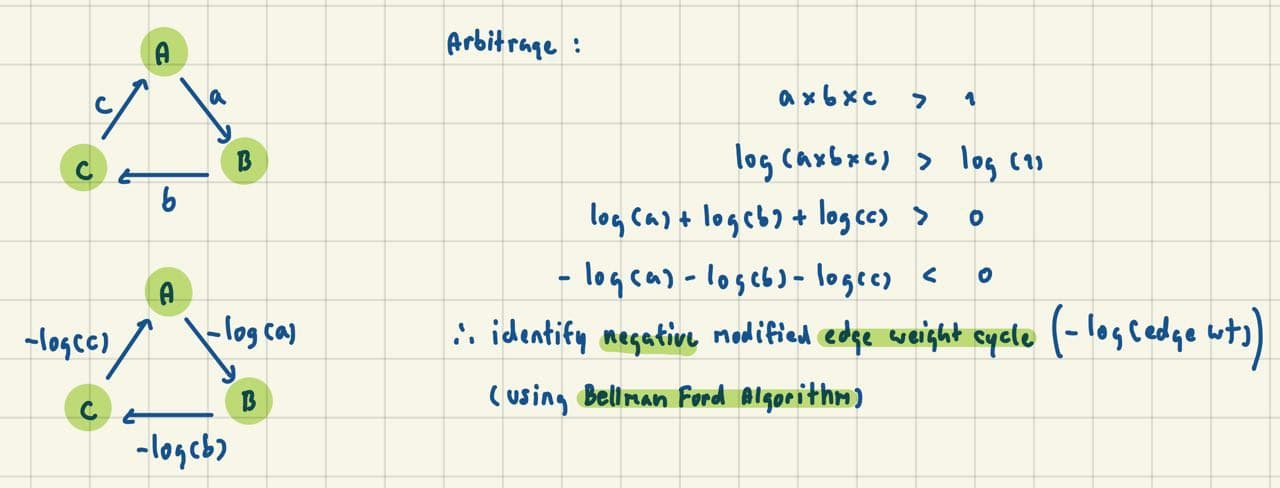

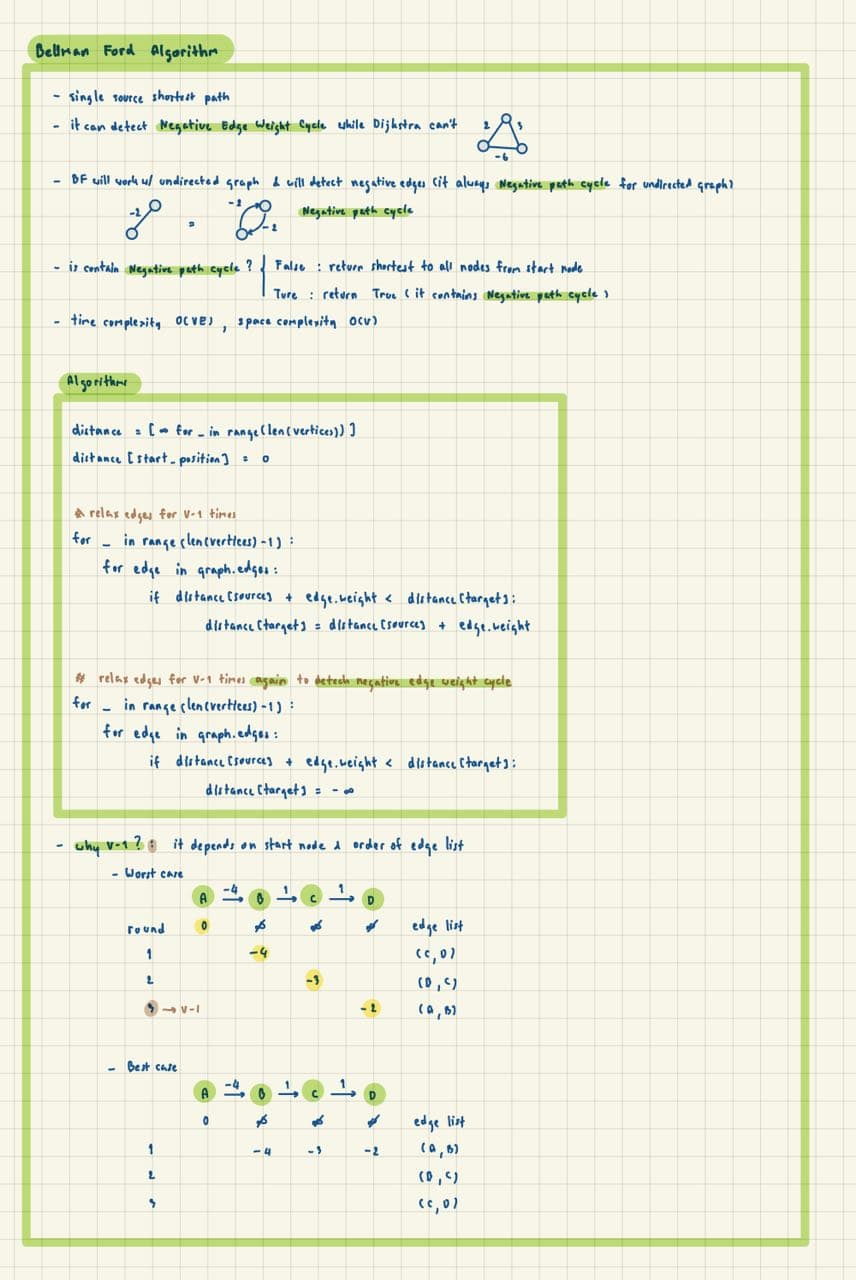